## SFI5904 - Redes Complexas

Projeto Prático 3: Modelo de redes Watts-Strogatz<br>
Primeiro Semestre de 2021

Docente: Luciano da Fontoura Costa (luciano@ifsc.usp.br) <br>

Estudante: Bruno F. Bessa (num. 5881890, bruno.fernandes.oliveira@usp.br) <br>
Universidade de São Paulo, São Carlos, Brasil.

<b>Escopo do projeto:</b>

Implementar redes de pequeno mundo (Watts-Strogatz) considerando diferentes valores de probabilidade de <br>
reconexão. <br>

Visualizar algumas das redes geradas. Apresentar: 
 - os histogramas de frequência relativa dos graus, 
 - coeficientes de aglomeração e distâncias mínimas, identificando nas respectivas legendas a média e o desvio padrão.

In [1]:
# Importação de bibliotecas necessárias para o processamento e visualização

import random
import numpy as np
import scipy
import math
import secrets
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from tqdm import tqdm
import time
from IPython import display

In [10]:
# Definição das redes e rotinas para cálculo de métricas

def regular_ring(N: int, 
                plot: bool = True,
                file_name: str = None) -> nx.classes.graph.Graph:
    """
    Define uma rede regular no formato de anel com as prpriedades:
     - cada nodo é ligado ao seu vizinho mais próximo
     - cada nodo é ligado ao seu segundo vizinho mais próximo
    """
    G = nx.Graph()
    for i in range(N):
        if i+1 <= N-1:
            G.add_edge(i, i+1)
        else:
            G.add_edge(i, 0)
            
    nodes = list(G.nodes())
    for i in range (0, len(nodes)):
        if i+2 < len(nodes):
            G.add_edge(i, i+2)
        else: 
            G.add_edge(i, i+2 - len(nodes))   

    # Para calcularmos medidas de distância precisaremos remover nós não conectados
    # No trecho abaixo mantemos somente o maior componente conctado da rede.
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)

    if plot:
        pos = nx.circular_layout(G)
        fig_net = nx.draw(G, pos, node_color='w', node_size=1, with_labels=False)
        plt.suptitle("Anel regular gerado com {} nodos.".format(N), fontsize=15)
        plt.show(fig_net)
    
    if file_name != None:
        pos = nx.circular_layout(G)
        fig_net = nx.draw(G, pos, node_color='w', node_size=1, with_labels=False)
        plt.suptitle("Anel regular gerado com {} nodos.".format(N), fontsize=15)
        plt.savefig("images/"+file_name)          
        plt.close(fig_net)
              
    return G

def reconnect_ring(G: nx.classes.graph.Graph, 
                  p: float,
                  plot: bool = True,
                  file_name: str = None) -> nx.classes.graph.Graph:
    """
    Dado um anel regular, para cada conexão avalia com probabilidade
    p'< p (dado como parâmetro)
    a remoção da aresta e criação de nova conexão com um nó aleatório da rede.
    """
    N = len(G)
    nodes = list(G.nodes())    
    for node in nodes:
        edges_node = list(G.edges(node))
        for edge in edges_node:
            if random.random() < p:
                random_node = secrets.choice(nodes)
                new_edge = (node, random_node)
                # Remove selected edge. Add new edge      
                G.remove_edge(list(edge)[0], list(edge)[-1])
                G.add_edge(node, random_node)  

    # Para calcularmos medidas de distância precisaremos remover nós não conectados
    # No trecho abaixo mantemos somente o maior componente conctado da rede.
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)
                
    if plot:
        pos = nx.circular_layout(G)
        fig_net = nx.draw(G, pos, node_color='w', node_size=1, with_labels=False)
        plt.suptitle("Rede de {} nodos reconectada com prob. {}".format(N, p), fontsize=15)
        plt.show(fig_net)
    
    if file_name != None:
        pos = nx.circular_layout(G)
        fig_net = nx.draw(G, pos, node_color='w', node_size=1, with_labels=False)
        plt.suptitle("Rede de {} nodos reconectada com prob. {}".format(N, p), fontsize=15)
        plt.savefig("images/"+file_name)          
        plt.close(fig)
    
    return G


def regular_reticulated(N: int, 
                        plot: bool = True,
                        file_name: str = None) -> nx.classes.graph.Graph:
    """
    Define uma rede reticulada regular com as propriedades:
     - cada nodo é conectado aos seus vizinhos mais próximos (horizontal e verticalmente)
     - as bordas da rede são ligadas entre si
     
     Dada a escolha de representaçào dos nodos como posiçõs em uma matriz, podemos usar
     a simetria da matriz para referenciar todos os pontos como elementos de uma única lista:
     
     A_ij = L[i+j*L]
     
     Por exmeplo, se N=10, haverá uma rede reticulada de 3x3 com arestas dadas por:
     list_edges = [ (0,1), (1,2), (2,0), 
                    (3,4), (4,5), (5,3), 
                    (6,7), (7,8), (8,6),
                    (0,3), (3,6), (6,0), 
                    (1,4), (4,7), (7,1), 
                    (2,5), (5,8), (8,2)]     
    """

    G = nx.Graph()
    L = math.floor(N**(0.5))
    
    # Ligações na horizontal  
    for i in range(L*L):
        x = i % L
        y = i // L
        if x+1 < L and y < L:
            G.add_edge(i, i+1)        
        else: 
            G.add_edge(i, L*y)
    # Ligações na vertical
    for i in range(L*L):
        y = i % L
        x = i // L
        if x+1 < L and y < L:
            G.add_edge(i, i+L)        
        else: 
            G.add_edge(i, y)
            
    # Para calcularmos medidas de distância precisaremos remover nós não conectados
    # No trecho abaixo mantemos somente o maior componente conctado da rede.
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)
            
    if plot:
        pos = nx.spring_layout(G)
        fig_net = nx.draw(G, pos, node_color='b', node_size=10, with_labels=False)
        plt.suptitle("Rede reticulada gerada com {} nodos.".format(N), fontsize=15)
        plt.show(fig_net)
    
    if file_name != None:
        pos = nx.spring_layout(G)
        fig_net = nx.draw(G, pos, node_color='', node_size=1, with_labels=False)
        plt.suptitle("Rede reticulada gerada com {} nodos.".format(N), fontsize=15)
        plt.savefig("images/"+file_name)          
        plt.close(fig_net)
          
    return G

def reconnect_regular(G: nx.classes.graph.Graph, 
                      p: float,
                      plot: bool = True,
                      file_name: str = None) -> nx.classes.graph.Graph:
    """
    Dada uma rede regular, para cada conexão avalia com probabilidade
    p'< p (dado como parâmetro)
    a remoção da aresta e criação de nova conexão com um nó aleatório da rede.
    """
    N = len(G)
    nodes = list(G.nodes())    
    for node in nodes:
        edges_node = list(G.edges(node))
        for edge in edges_node:
            if random.random() < p:
                random_node = secrets.choice(nodes)
                new_edge = (node, random_node)
                # Remove selected edge. Add new edge      
                G.remove_edge(list(edge)[0], list(edge)[-1])
                G.add_edge(node, random_node)           

    # Para calcularmos medidas de distância precisaremos remover nós não conectados
    # No trecho abaixo mantemos somente o maior componente conctado da rede.
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)
                
    if plot:
        pos = nx.spring_layout(G)
        fig_net = nx.draw(G, pos, node_color='w', node_size=1, with_labels=False)
        plt.suptitle("Rede de {} reconectada com prob. {}".format(N, p))
        plt.show(fig_net)
    
    if file_name != None:
        pos = nx.spring_layout(G)
        fig_net = nx.draw(G, pos, node_color='w', node_size=1, with_labels=False)
        plt.suptitle("Rede de {} reconectada com prob. {}".format(N, p))
        plt.savefig("images/"+file_name)          
        plt.close(fig)

    return G

def avg_shortest_path(G: nx.classes.graph.Graph) -> float:
    """
    Percorre todos os nodos do grafo e para cada um deles verifica o menor caminho até todos os demais.
    Retorna a média desses valoeres.
    Disclaimer: this function uses shortest_path_length build in function from NetworkX library.
    """
    dict_shortest_paths = nx.shortest_path_length(G)
    node_path_avg = []
    for node, paths in dict_shortest_paths:
        node_path_avg.append(sum(paths.values())/len(G.nodes()))
    
    return sum(node_path_avg)/len(node_path_avg)

def test_avg_shortest_path(N: int, p: list, sample: int = 1) -> float:

    #pbar = tqdm(total=n*sample)
    avg_sp = []
    for s in range(sample):
        G = regular_reticulated(N, False)
        reconnect_regular(G, p, False)
        avg_sp.append(avg_shortest_path(G))
        #pbar.update(n)
    
    #pbar.close()
    return sum(avg_sp)/len(avg_sp)

def plot_avg_shortest_path(N: int, sample: int, file_name:str = None) -> None:
    
    p = [0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.5, 0.75, 1]
    SP = [test_avg_shortest_path(n, x, sample) for x in p]  
    
    fig, ax = plt.subplots()
    ax.plot(p, SP,'k--', label='Num. de nodos {}'.format(n))
    legend = ax.legend(loc='upper right')
    plt.xlabel('Probabilidade de reconexão')
    plt.ylabel("Menor tamanho médio")
    plt.show()

    if file_name != None:
        fig.savefig("images/"+file_name)

def degree_distribution(G: nx.classes.graph.Graph) -> list:

    """
    Retorna a lista de valores de grau (k) para todos os nós da rede.
    """

    dict_degree = dict(G.degree())
    list_k = []
    for node, k_value in dict_degree.items():
        list_k.append(k_value)    
    
    return list_k
    
def clustering_coef_distribution(G: nx.classes.graph.Graph) ->list:
    
    """
    Retorna a lista de valores de cluster coefficient (cc) para todos os nós da rede.

    """
    
    list_cc_nodes = []
    for node in G.nodes():
        list_cc_nodes.append(nx.clustering(G, node))

    return list_cc_nodes
        
def spl_distribution(G: nx.classes.graph.Graph) ->list:
    """
    Retorna a lista de valores de shortest path length (spl) para todos os nós da rede.

    """    
    
    N = len(G)
    if nx.is_connected(G) == True:
        distance_matrix = np.zeros(shape=(N,N)) 
        diameter = nx.diameter(G)
        slp_values = []        
        for i in np.arange(0,N):
            for j in np.arange(i+1, N):
                if(i != j):
                    aux = nx.shortest_path(G,i,j)
                    dij = len(aux)-1
                    distance_matrix[i][j] = dij
                    distance_matrix[j][i] = dij
                    slp_values.append(dij)        
        return slp_values
    else:
        pass
    
def shannon_entropy(G: nx.classes.graph.Graph) ->float:
    
    """
    Calcula a entropia de Shannon para um grafo G recebido como parâmetro.
    """
    list_k = degree_distribution(G)
    min_k = np.min(list_k)
    max_k = np.max(list_k)

    k_values= np.arange(0,max_k+1) 
    k_prob = np.zeros(max_k+1) 
    for k in list_k:
        k_prob[k] = k_prob[k] + 1
    k_prob = k_prob/sum(k_prob)
    
    H = 0
    for p in k_prob:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H
        
def distribution_plot(list_values: list,
                     plot_title: str = "Histograma de densidade",
                     var_name: str = "Variável",
                     file_name: str = None) -> None:
    """
    Produz histgrama de uma medida recebida na forma de lista.
    """
    
    avg_value = np.mean(list_values) 
    var_value = np.var(list_values)
    
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(list_values, density=True)
    ax.set_xlabel(var_name)
    ax.set_ylabel("Densidade de probabilidade")
    ax.set_title("{} de {}: média={:.2f}, var={:.2f}".format(plot_title, 
                                                             var_name, 
                                                             avg_value, 
                                                             var_value), 
                                                             fontsize=15)
    plt.show(True)
    if file_name != None:
        fig.savefig("images/"+file_name)
        
def correlation_plot(x: list, 
                         y: list, 
                         x_label: str = "x", 
                         y_label: str = "y", 
                         file_name: str = None) -> None:
    """
    Produz gráfico de dispersão de duas variáveis x e y recebidas na forma de listas.
    Calcula correlação de Pearson e Spearman para x e y.
    """    
    
    pearson_corr = np.corrcoef(x, y)[0,1]
    spearman_corr, spearman_pval = scipy.stats.spearmanr(x, y)
    
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title("Dispersão de {} e {}: Pearson: {:.2f}, Spearman: {:.2f} (p-val: {:.3f})".format(x_label, 
                                                                                           y_label,
                                                                                           pearson_corr,
                                                                                           spearman_corr,
                                                                                           spearman_pval), 
                                                                                           fontsize=15)
    plt.show(True)
    if file_name != None:
        fig.savefig("images/"+file_name)
        
def simple_plot2d(x: list, 
                     y: list, 
                     x_label: str = "x", 
                     y_label: str = "y", 
                     file_name: str = None) -> None:
    """
    Produz gráfico simples com associação entre suas variáveis x e y recebidas na forma de listas.
    """    
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title("Dispersão de {} e {}".format(x_label, y_label, fontsize=15))
    plt.show(True)
    if file_name != None:
        fig.savefig("images/"+file_name)
        

Vamos agora reproduzir alguns experimentos com as redes de Watts-Strogatz. <br>
Para conseguirmos visualizar as conexões da rede, usaremos diferentes valores de número de nós (10 50 100, 500). <br>

In [ ]:
# Anel Regular
list_N = [10, 50, 100, 500]
list_p = [0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.5, 0.75, 1]
network_model = "ws_ring"

for _n in list_N:
    for _p in list_p:
        G = regular_ring(_n, True, "graph_{}_n{}_regular.jpg".format(network_model, str(_n)))
        G = reconnect_ring(G, _p, "graph_{}_n{}_reconnected.jpg".format(network_model, str(_n)))
        degree_dist = degree_distribution(G)
        cluster_dist = clustering_coef_distribution(G)
        spl_dist = spl_distribution(G)
        distribution_plot(degree_dist, var_name="Grau", file_name="degree_dist_{}_n{}.jpg".format(network_model, str(_n), str(_p)))
        distribution_plot(cluster_dist, var_name="Cluster Coefficient",file_name="cc_dist_{}_n{}.jpg".format(network_model, str(_n), str(_p)))
        distribution_plot(spl_dist, var_name="SPL", file_name="spl_dist_{}_n{}.jpg".format(network_model, str(_n), str(_p)))

        
list_N = [500]
list_p = [0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.5, 0.75, 1]
list_mean_k = []
list_mean_cc = []
list_shannon_entropy = []

for _n in list_N:
    for _p in list_p:
        G = regular_ring(_n, False)
        G = reconnect_regular_ring(G, _p, False)
        degree_dist = degree_distribution(G)
        cluster_dist = clustering_coef_distribution(G)
        list_mean_k.append(np.mean(degree_dist))
        list_mean_cc.append(np.mean(cluster_dist))
        list_shannon_entropy.append(shannon_entropy(G))
        
simple_plot2d(list_p, list_mean_k, "p", "Grau médio", "plot2d_p_mean_k_{}.jpg".format(network_model))
simple_plot2d(list_p, list_mean_cc, "p", "Cluster Coef.", "plot2d_p_mean_cc_{}.jpg".format(network_model))
simple_plot2d(list_p, list_shannon_entropy, "p", "Entropia de Shannon", "plot2d_p_shannon_{}.jpg".format(network_model))

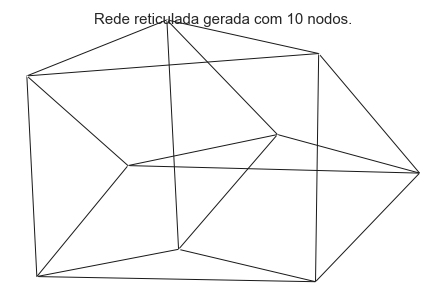

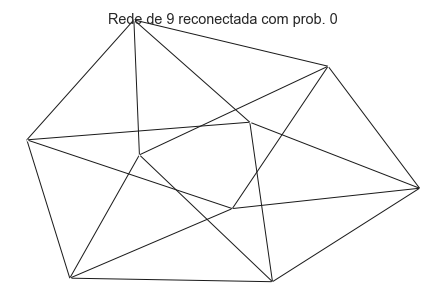

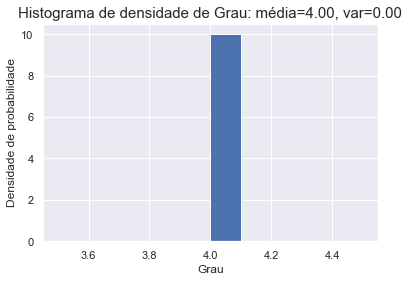

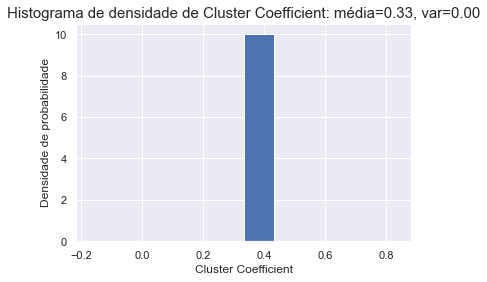

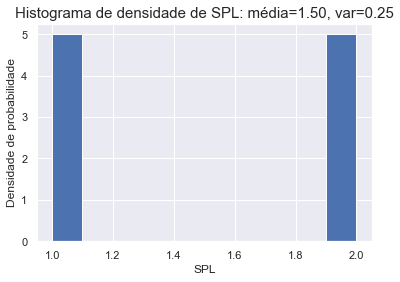

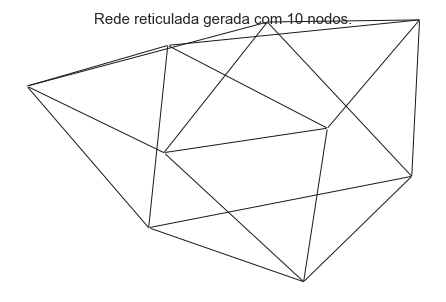

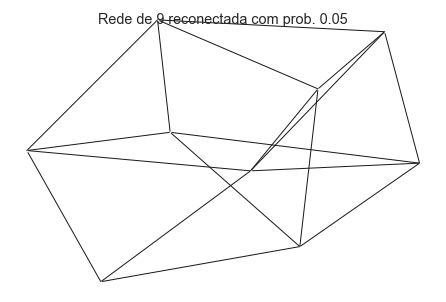

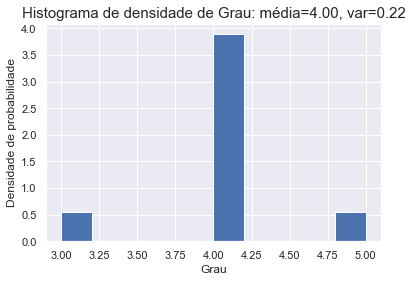

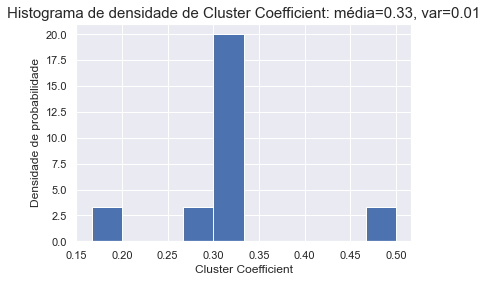

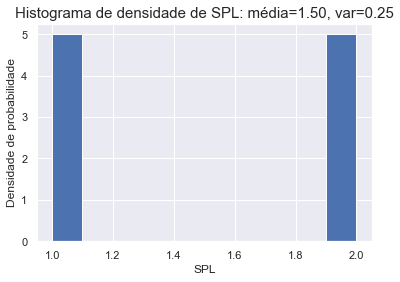

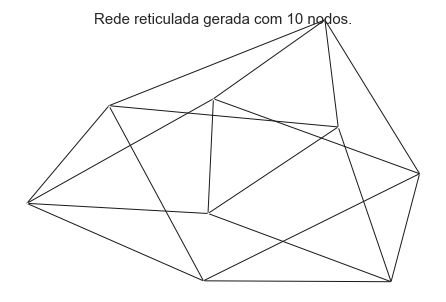

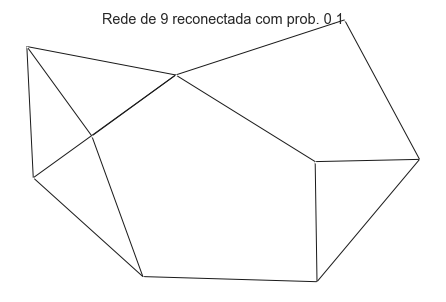

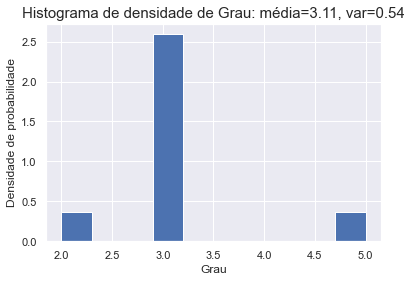

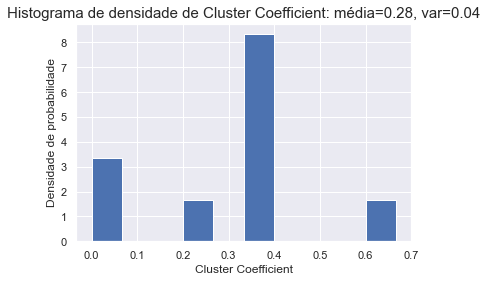

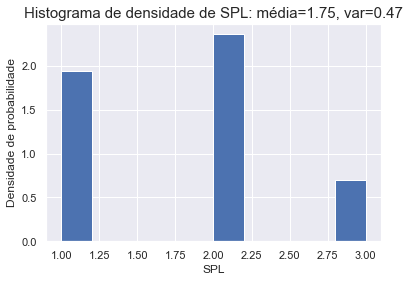

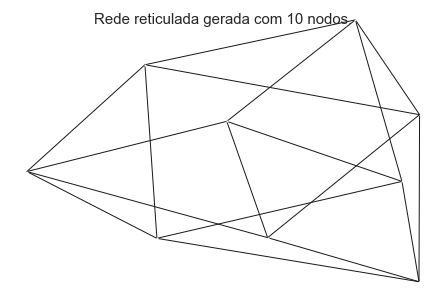

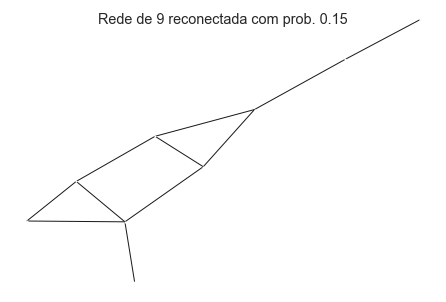

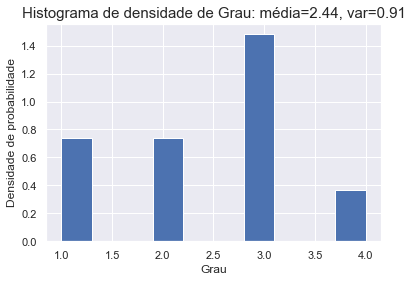

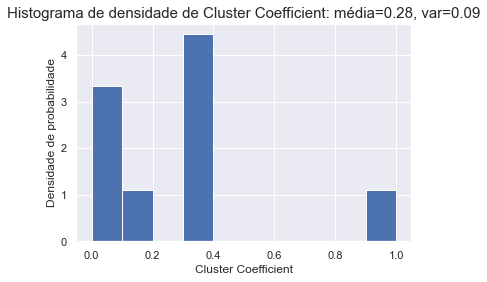

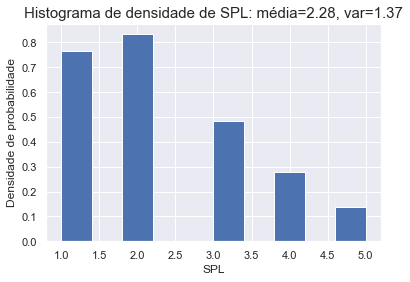

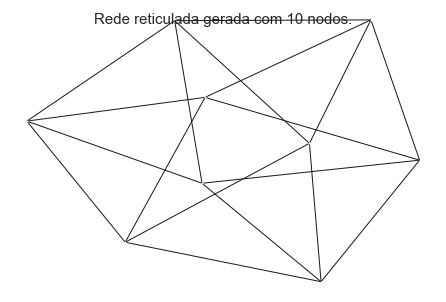

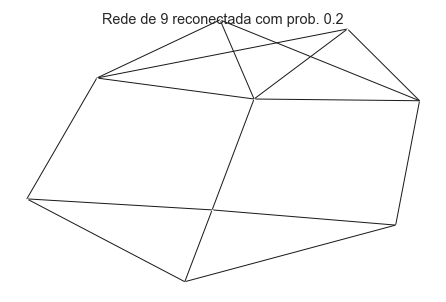

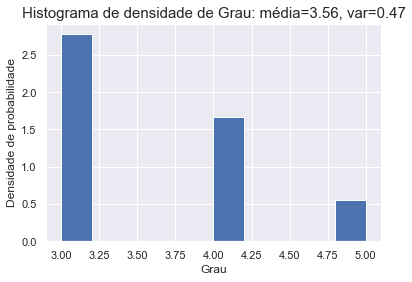

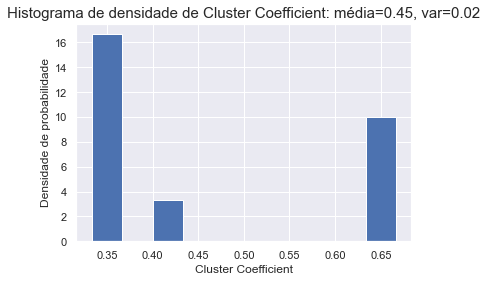

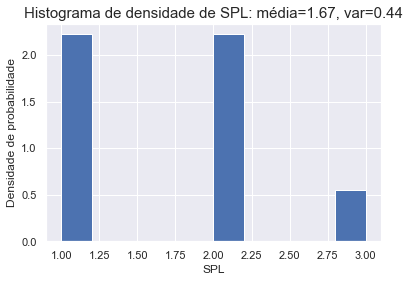

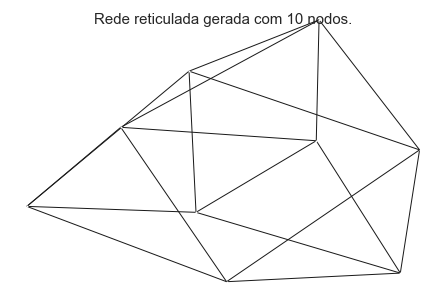

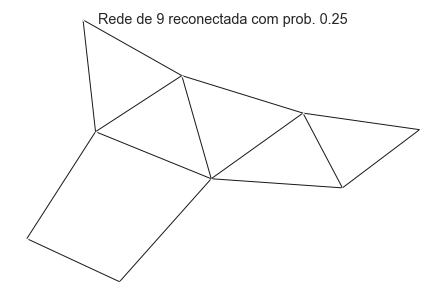

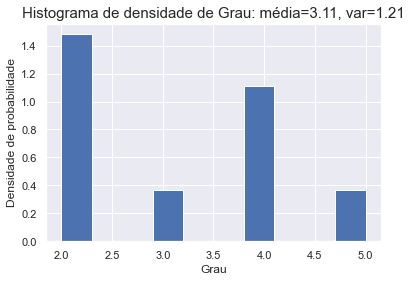

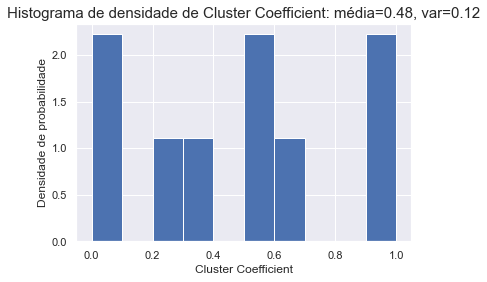

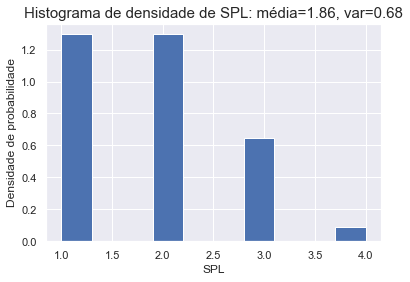

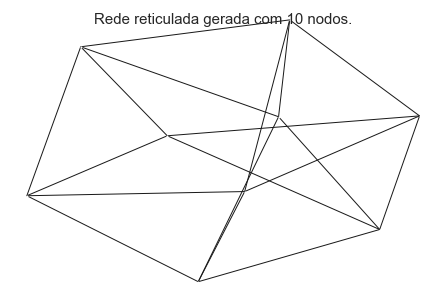

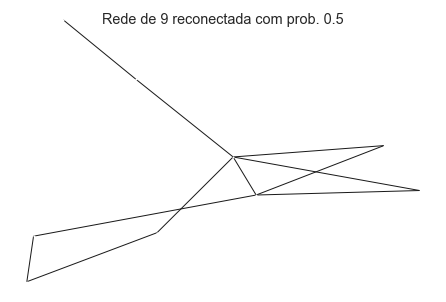

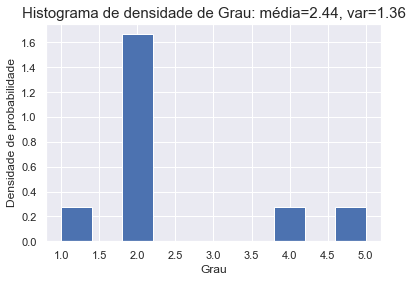

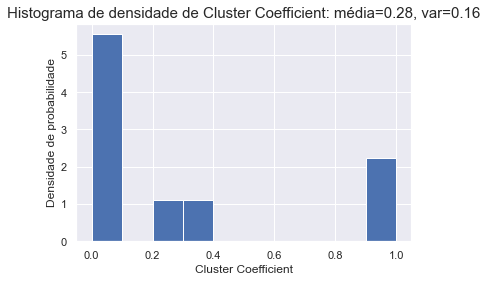

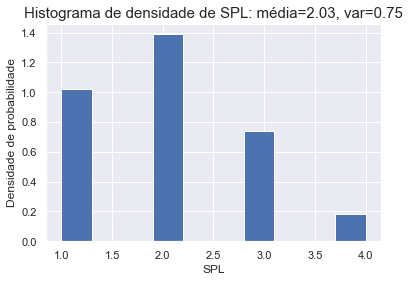

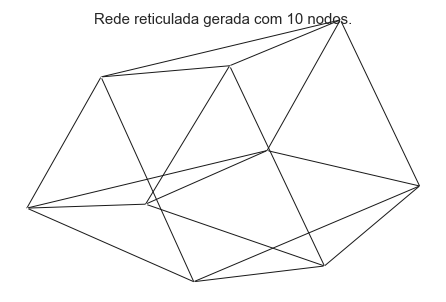

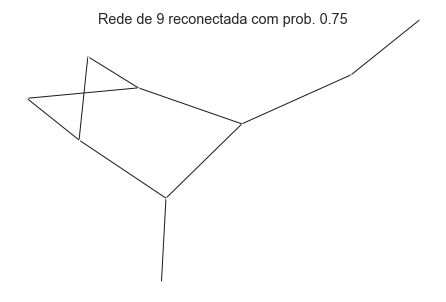

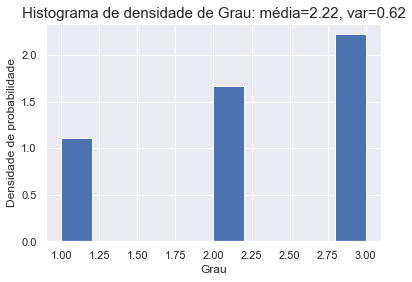

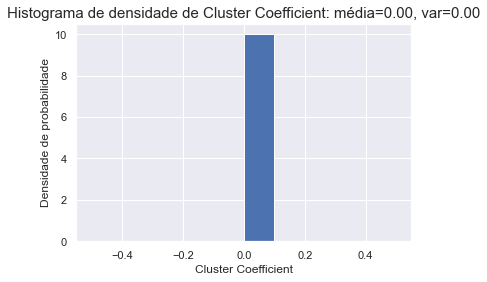

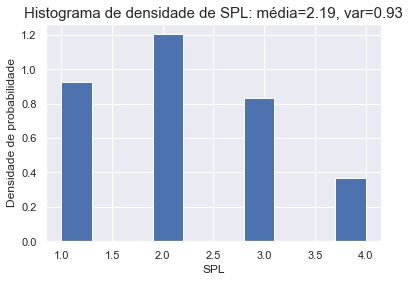

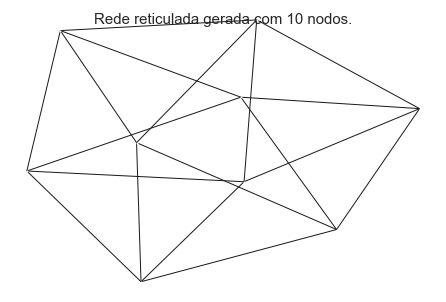

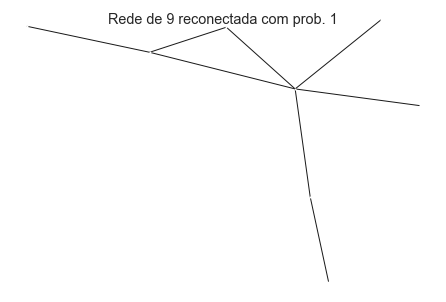

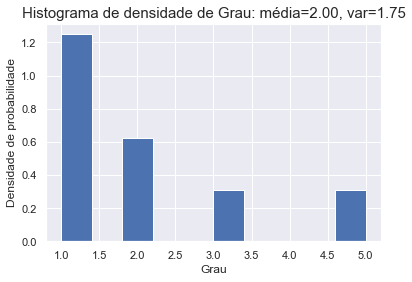

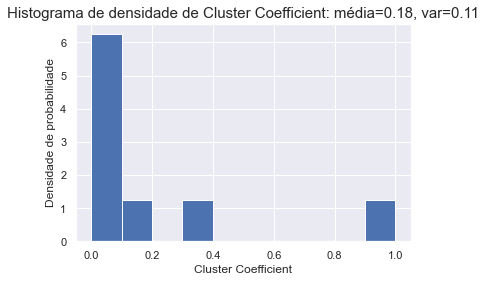

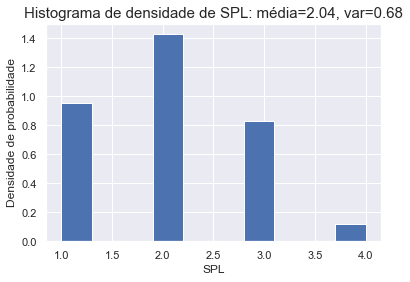

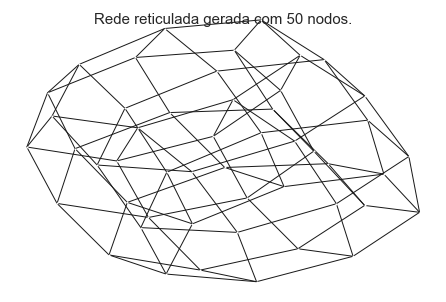

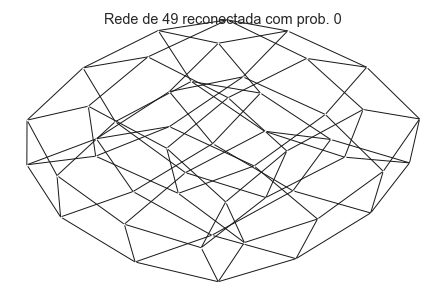

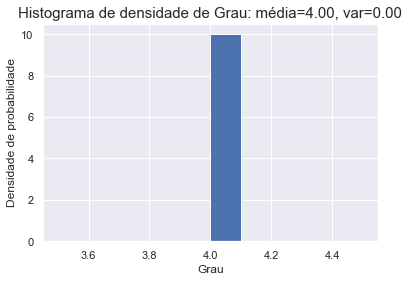

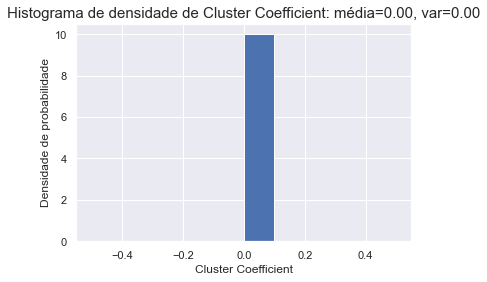

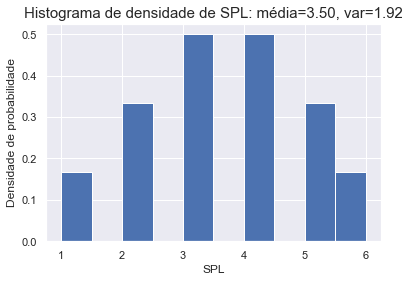

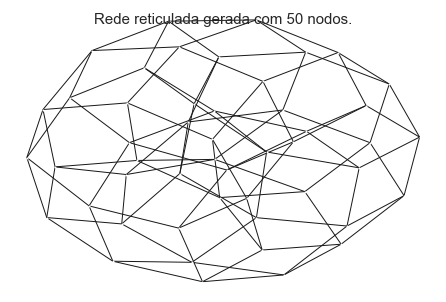

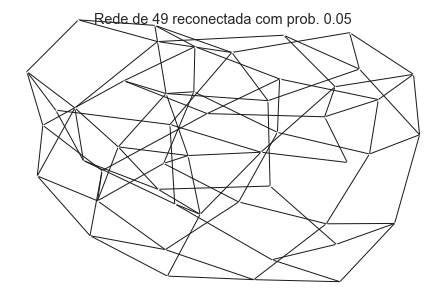

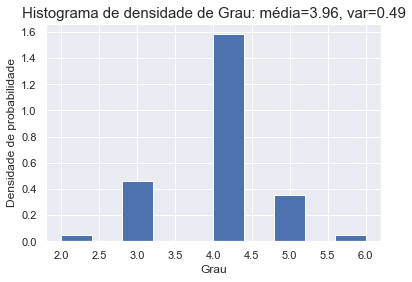

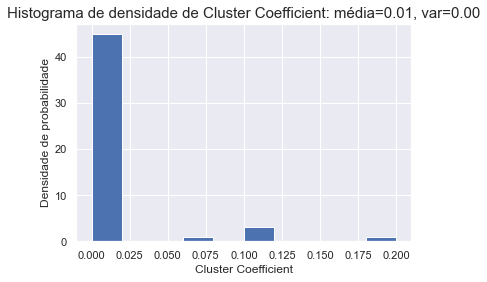

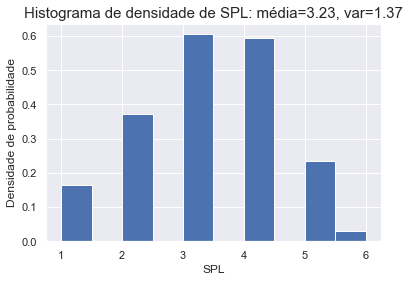

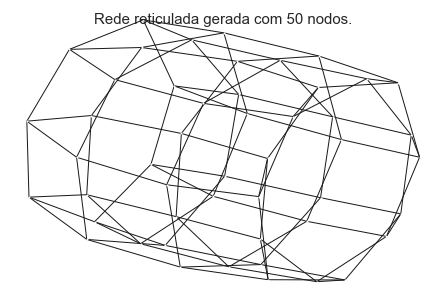

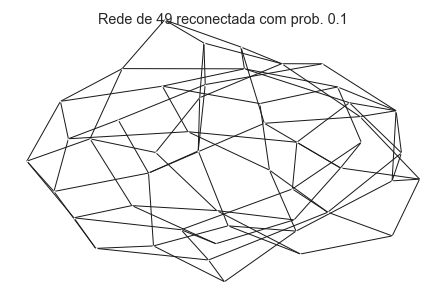

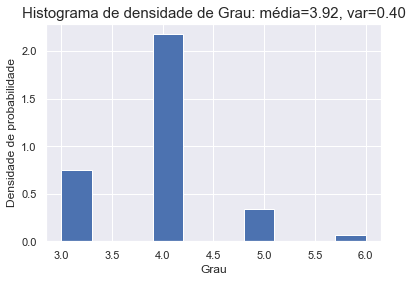

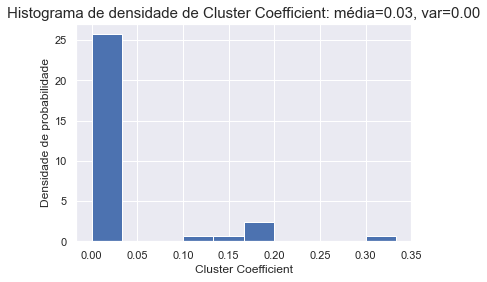

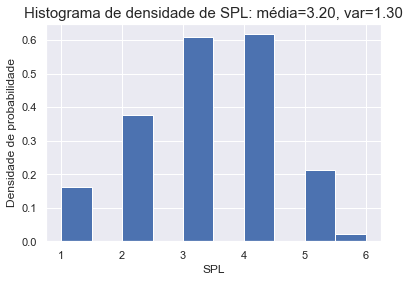

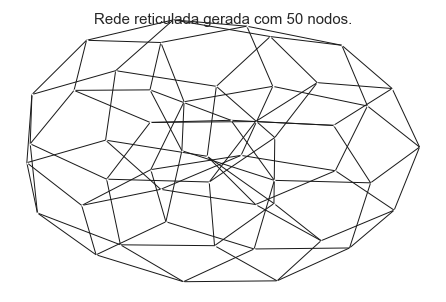

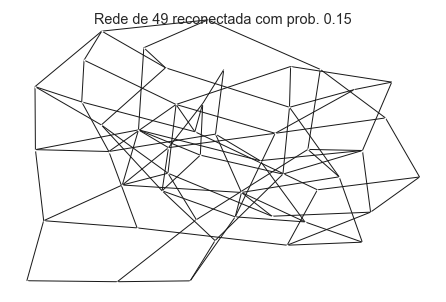

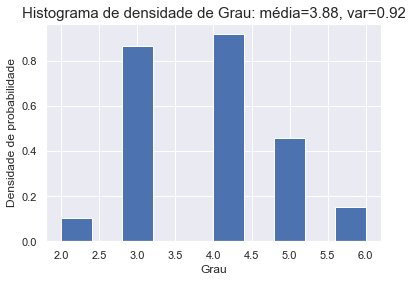

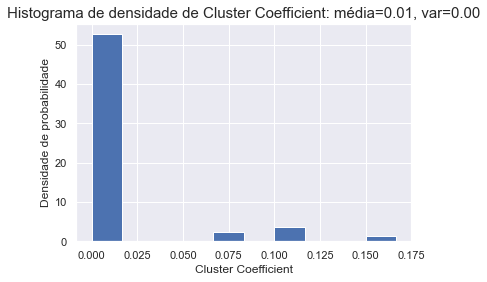

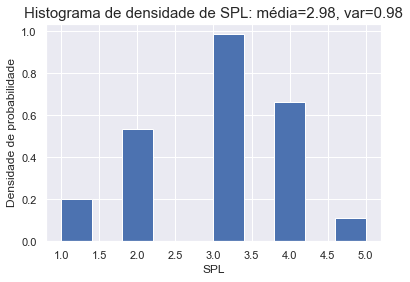

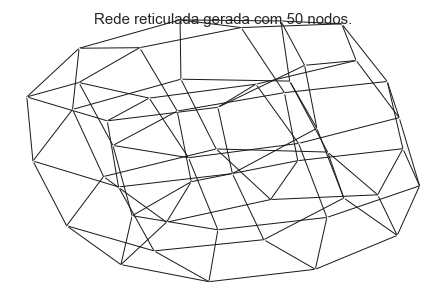

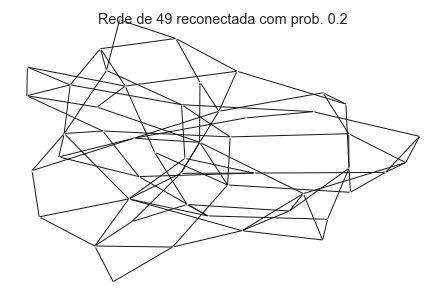

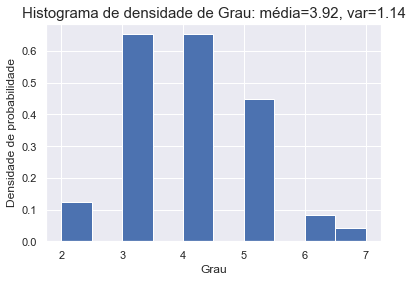

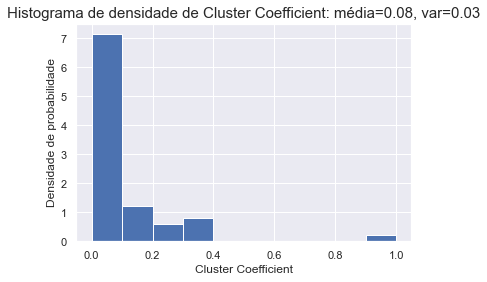

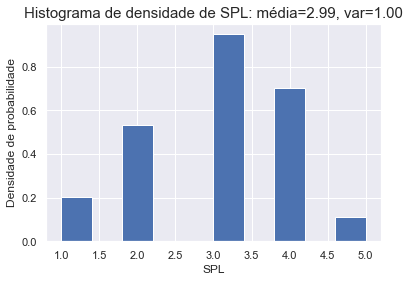

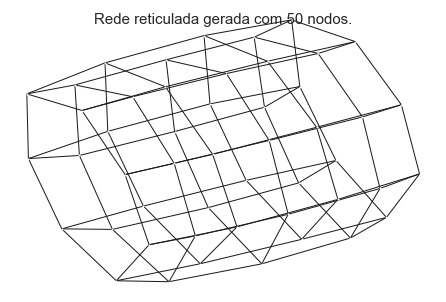

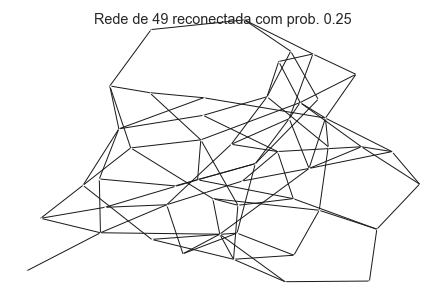

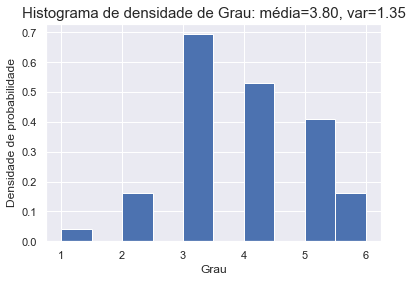

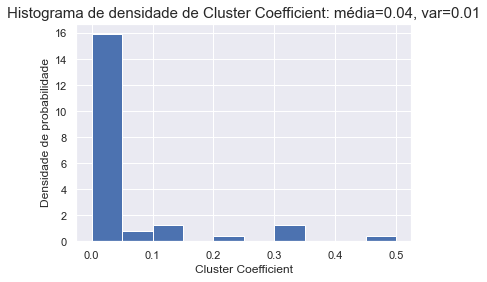

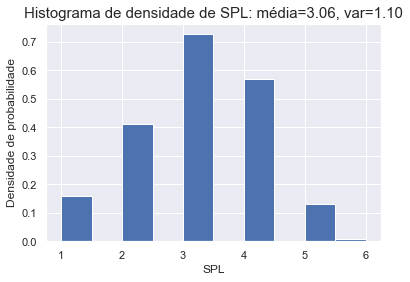

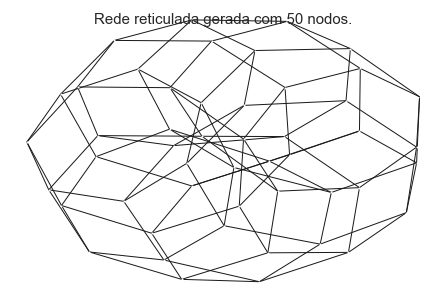

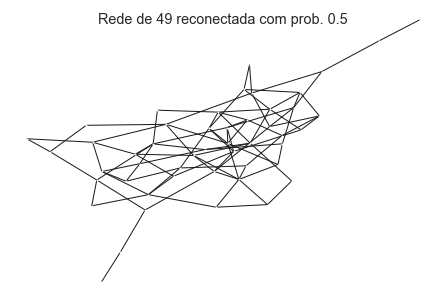

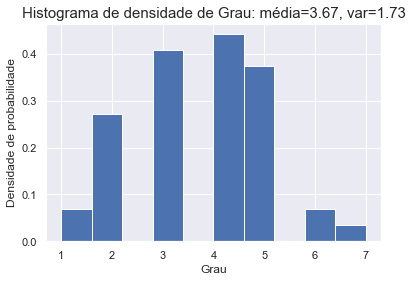

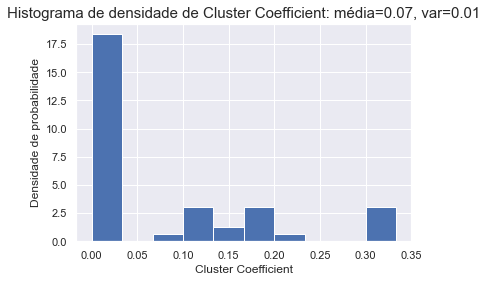

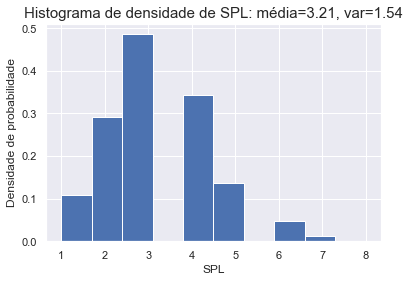

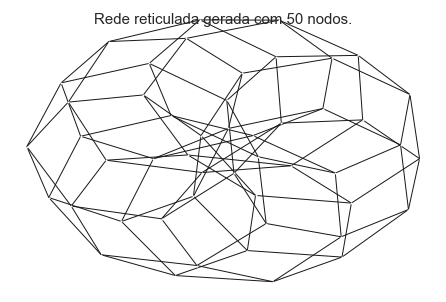

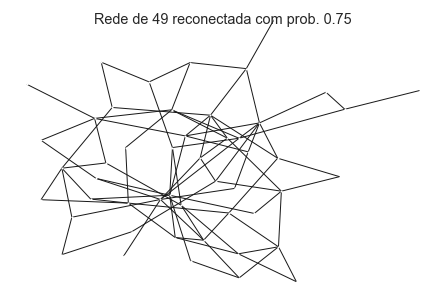

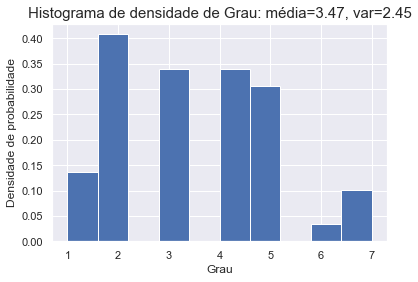

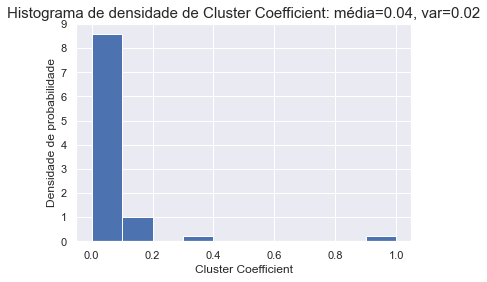

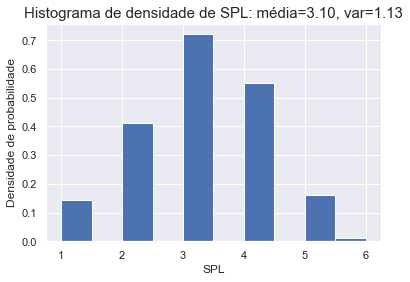

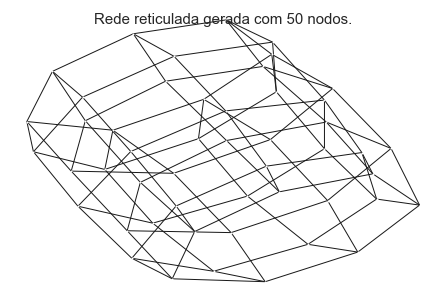

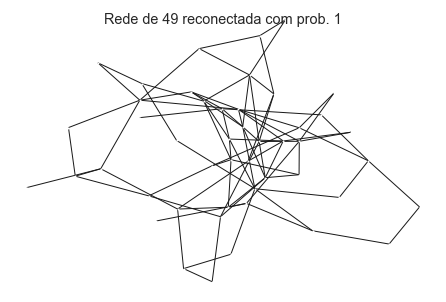

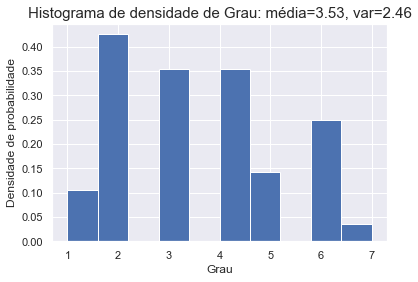

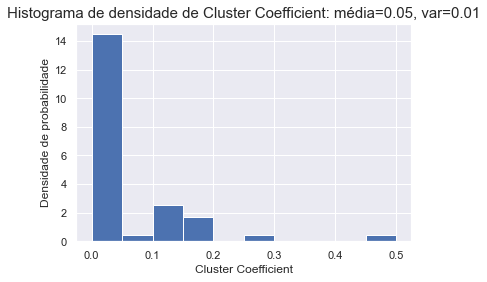

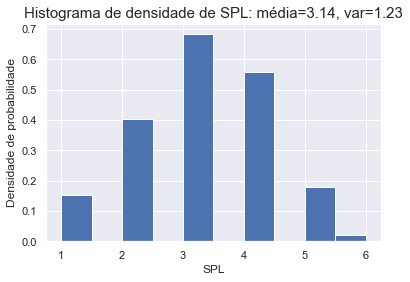

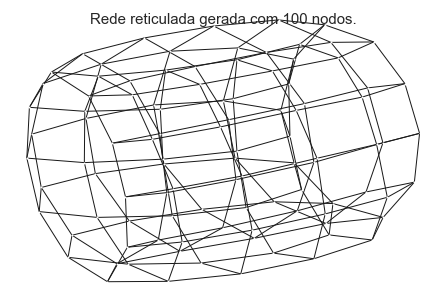

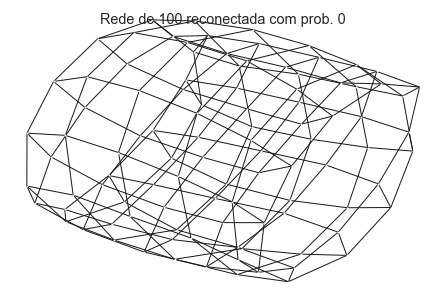

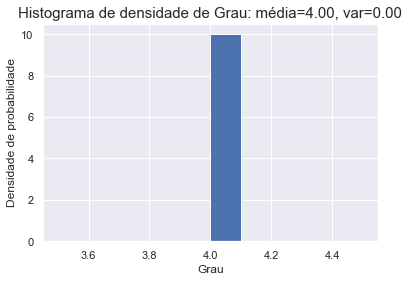

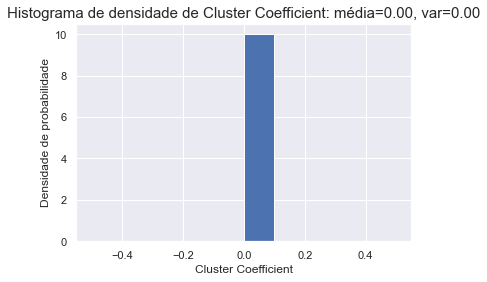

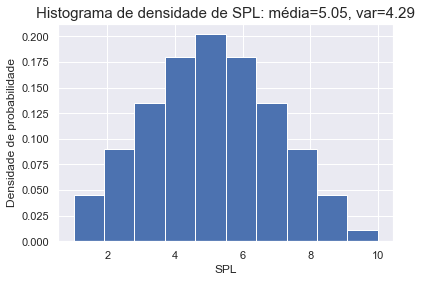

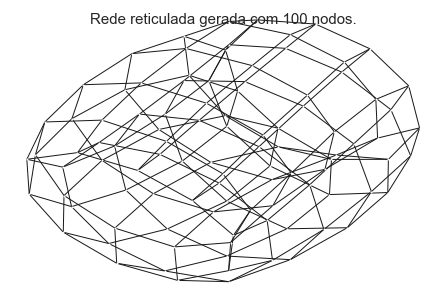

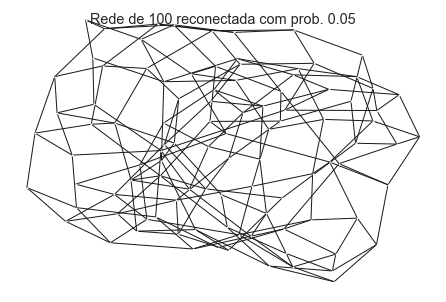

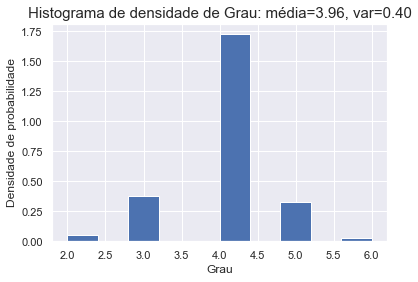

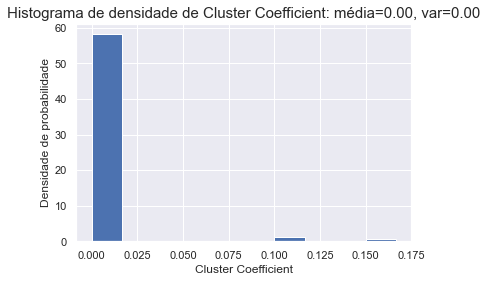

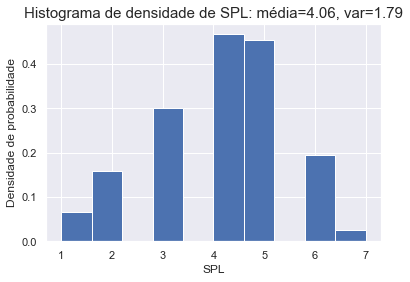

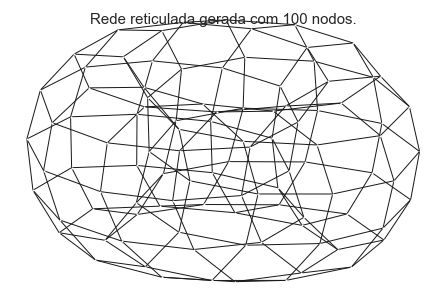

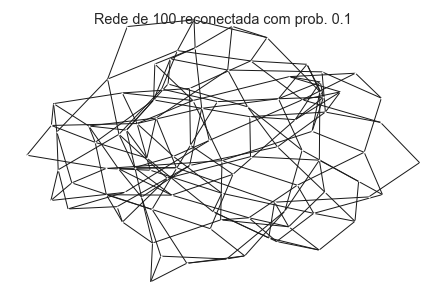

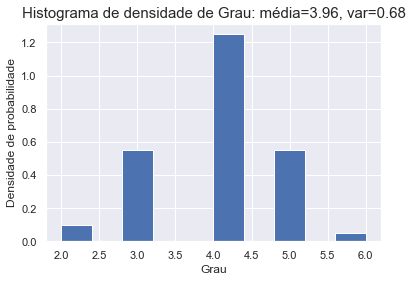

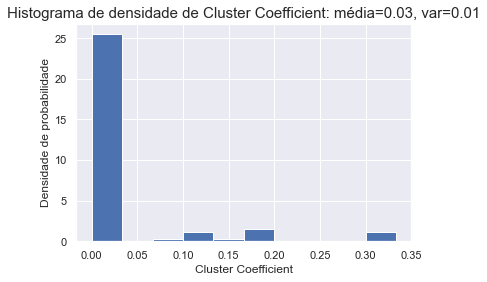

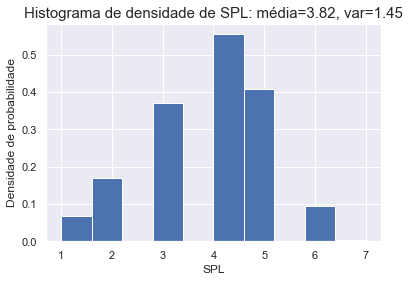

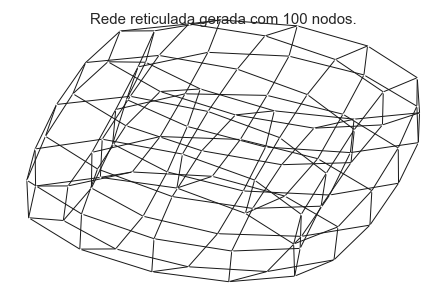

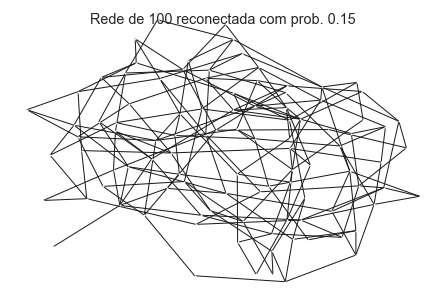

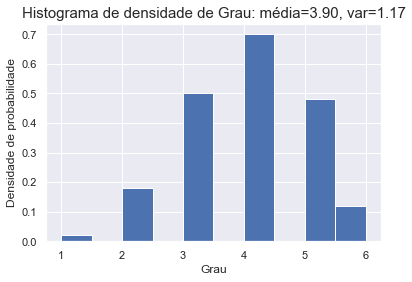

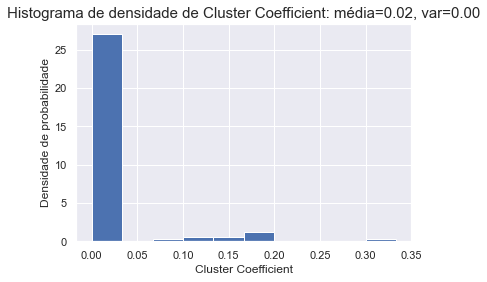

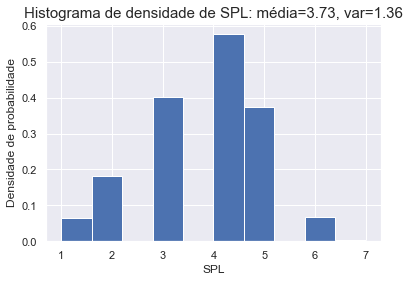

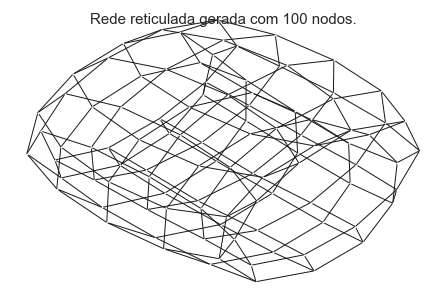

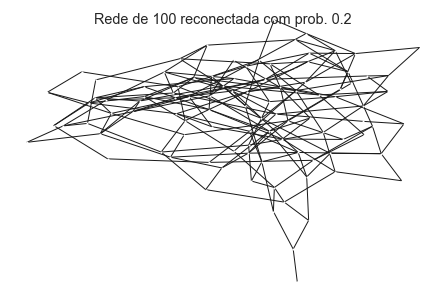

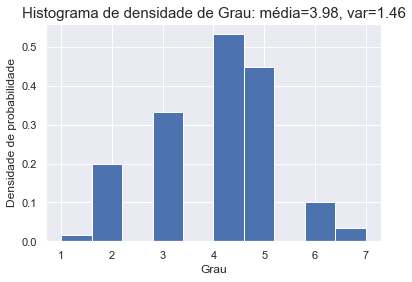

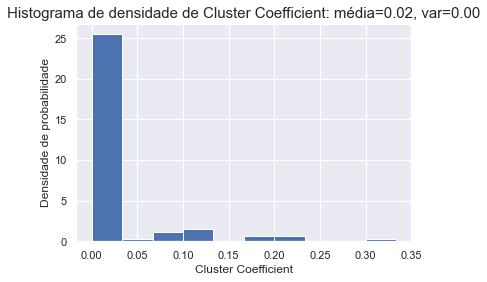

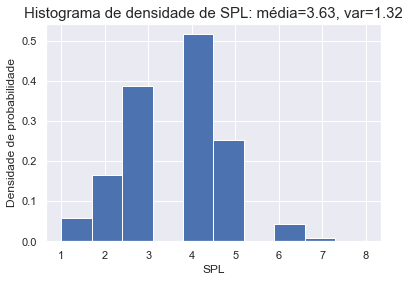

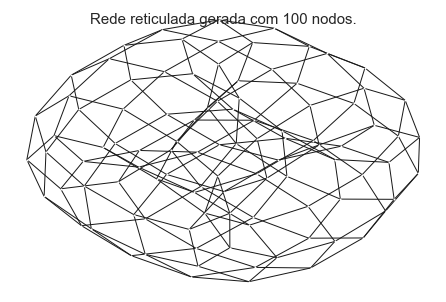

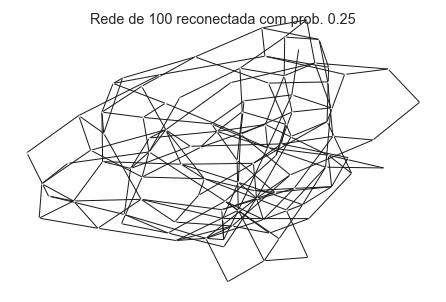

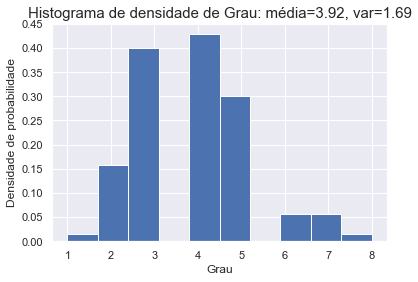

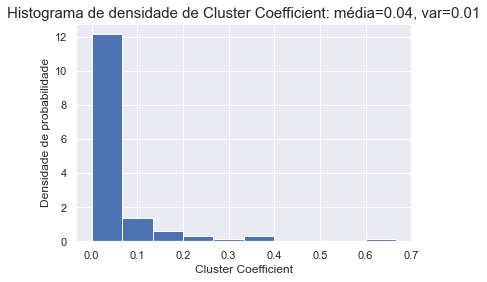

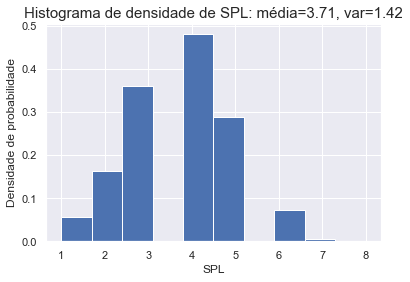

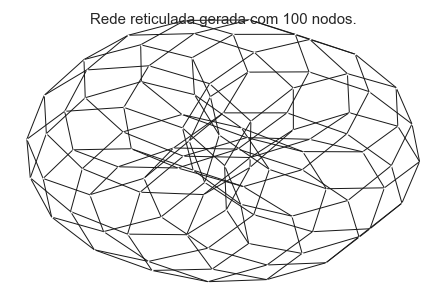

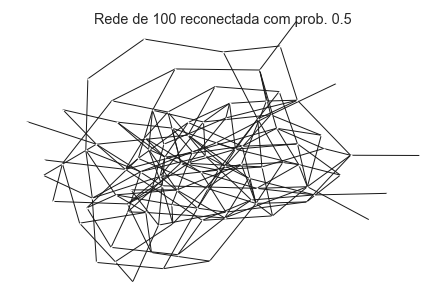

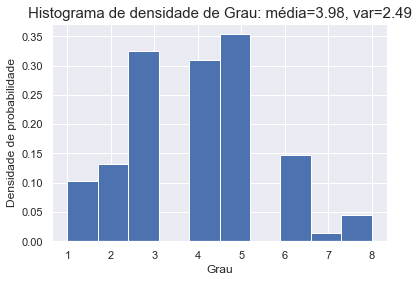

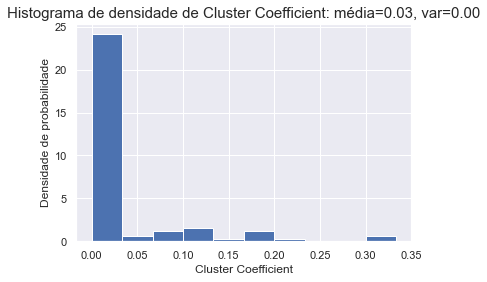

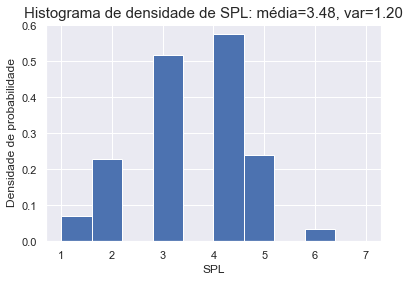

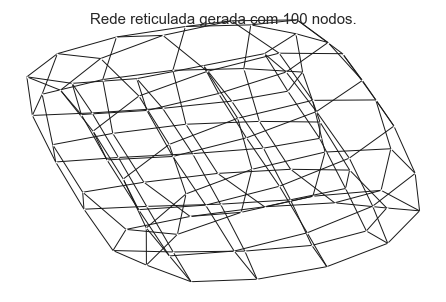

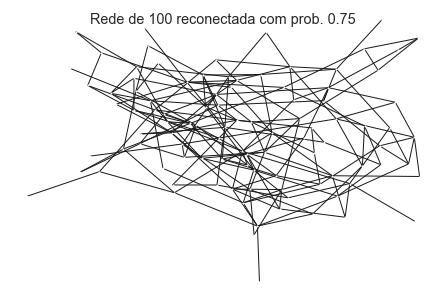

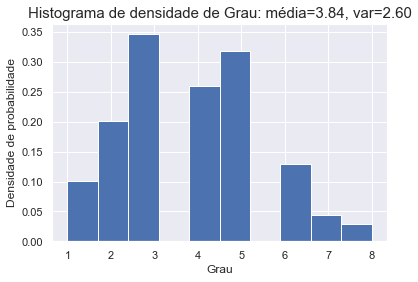

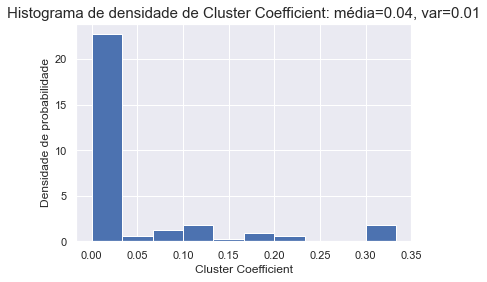

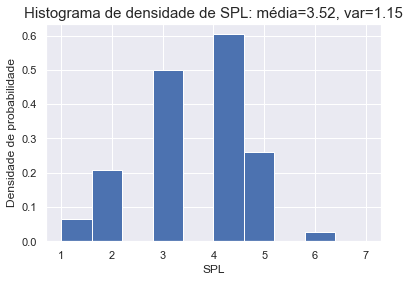

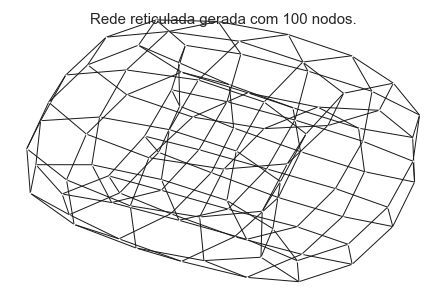

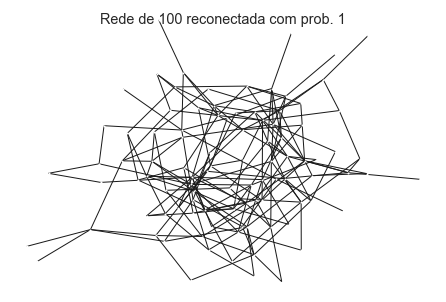

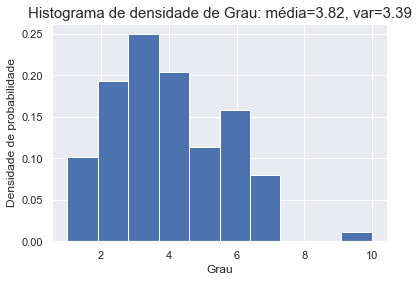

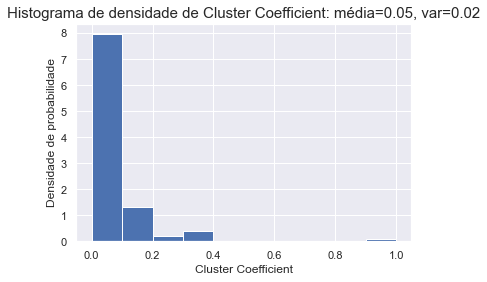

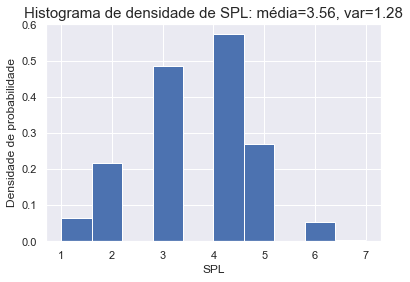

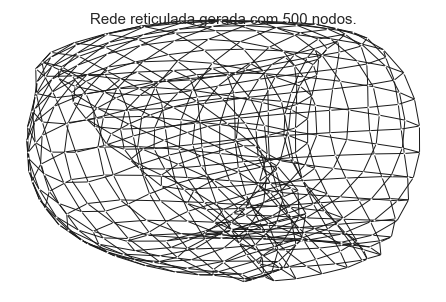

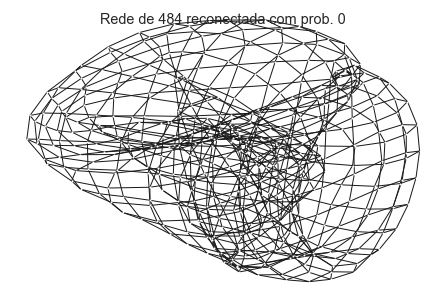

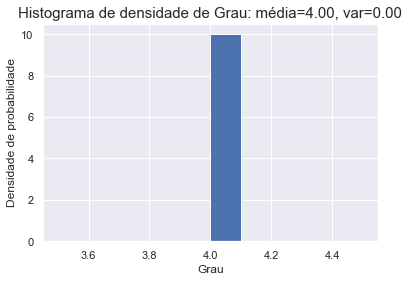

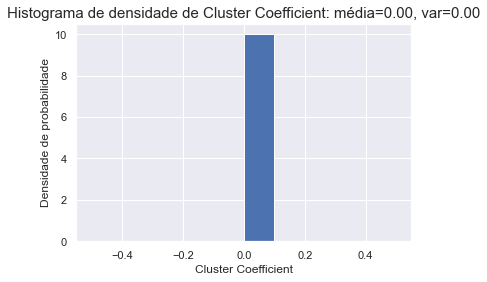

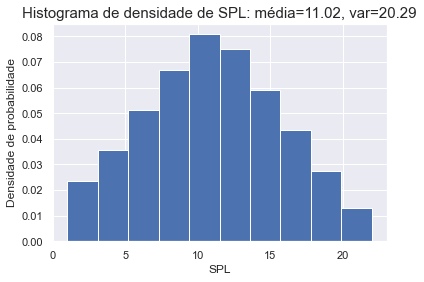

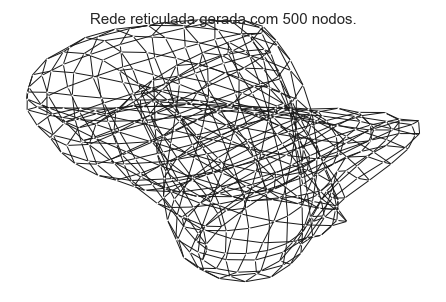

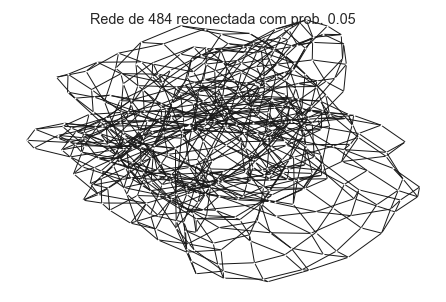

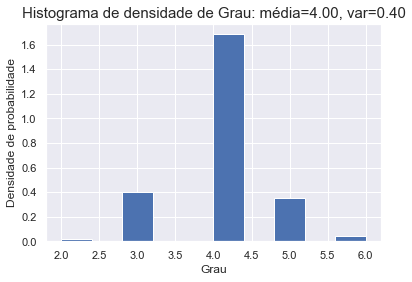

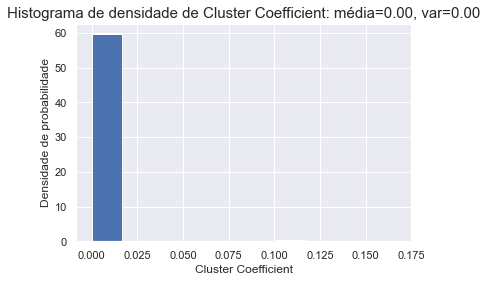

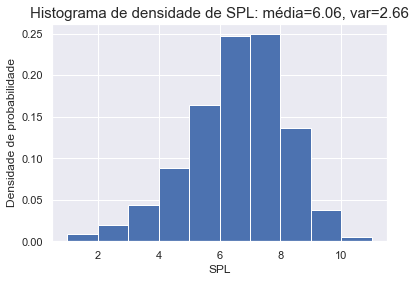

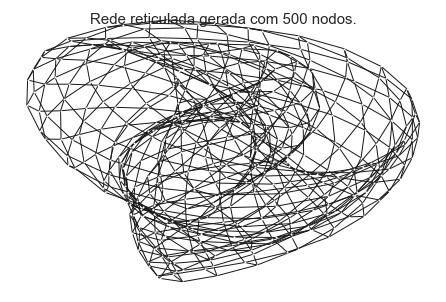

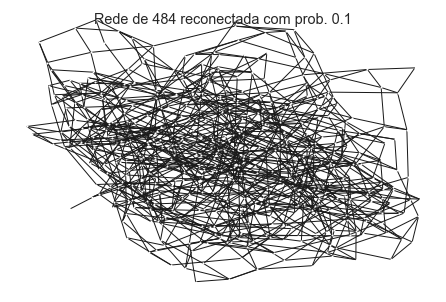

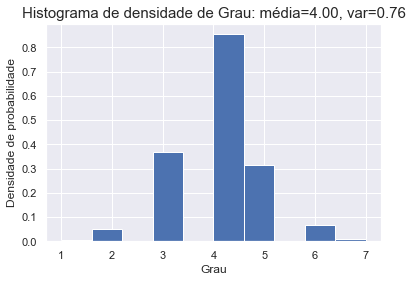

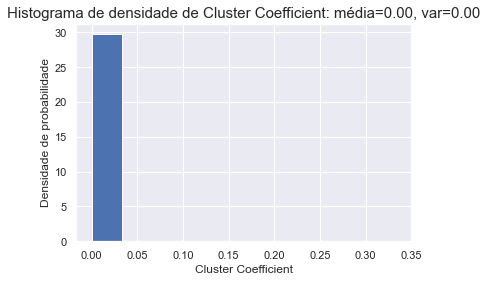

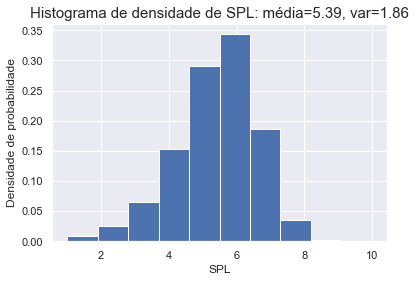

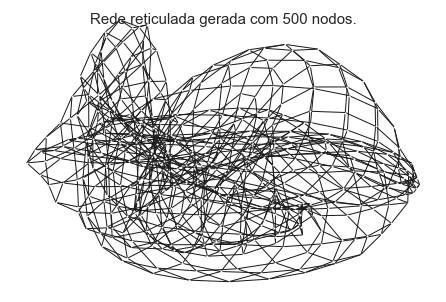

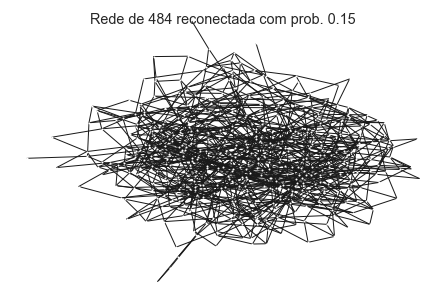

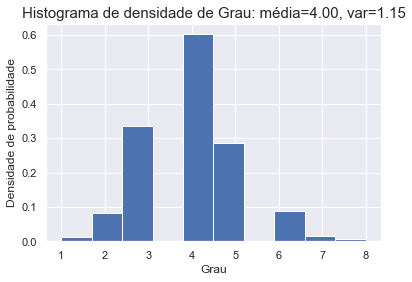

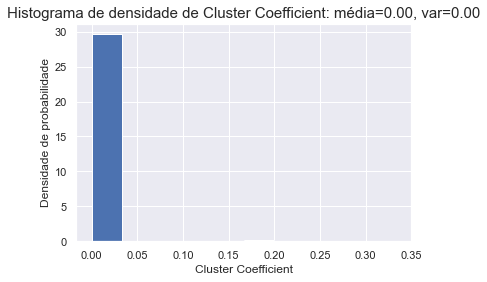

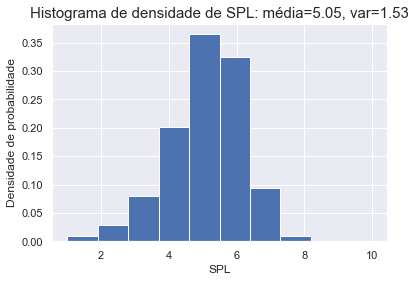

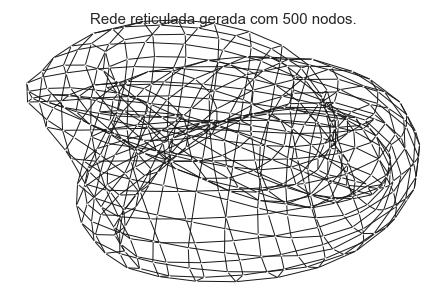

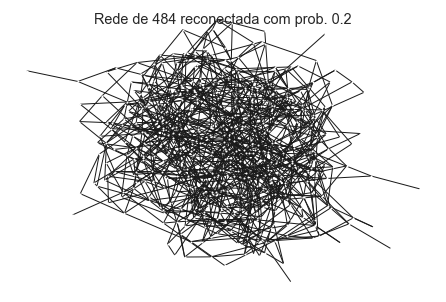

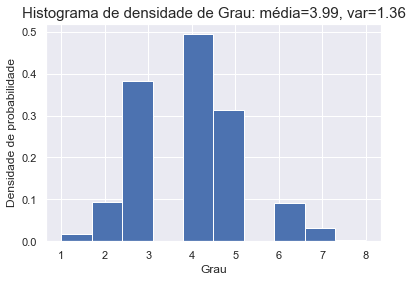

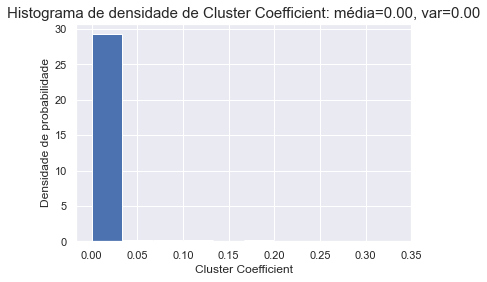

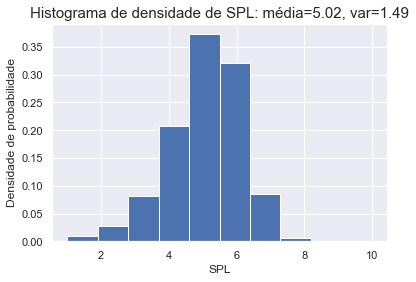

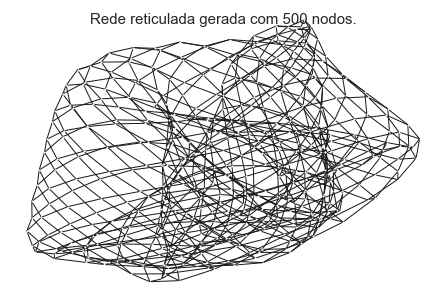

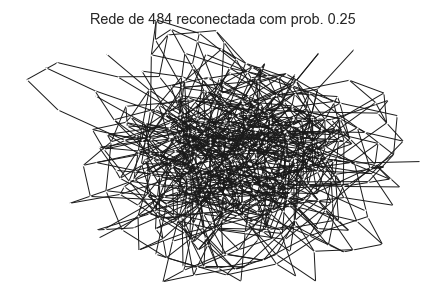

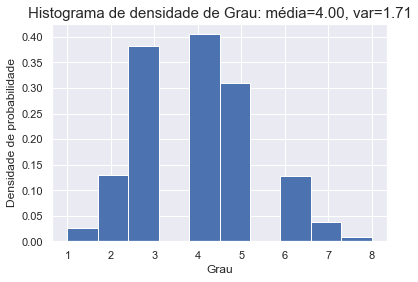

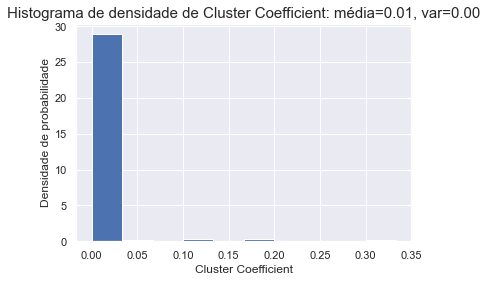

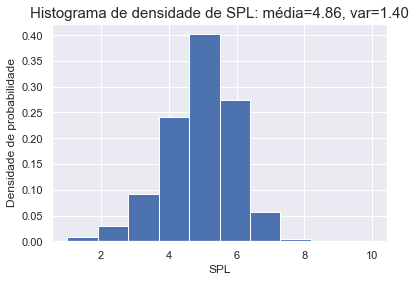

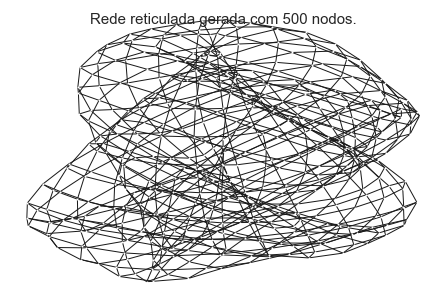

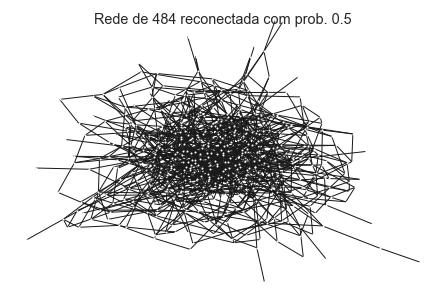

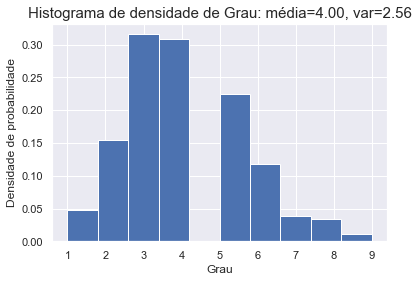

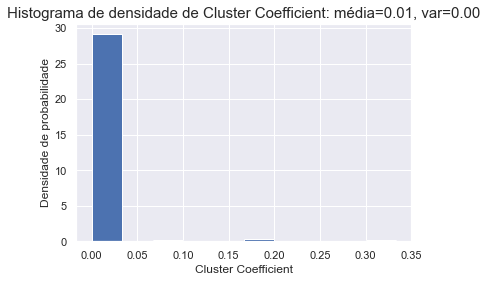

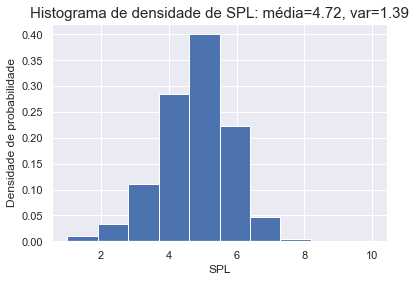

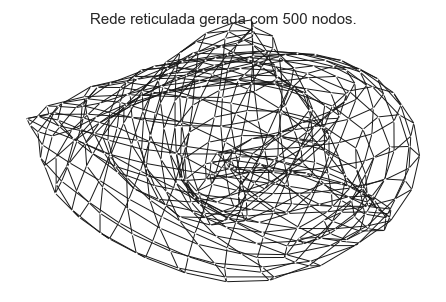

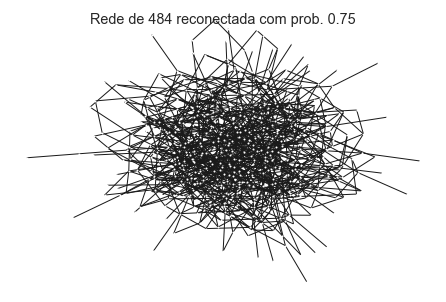

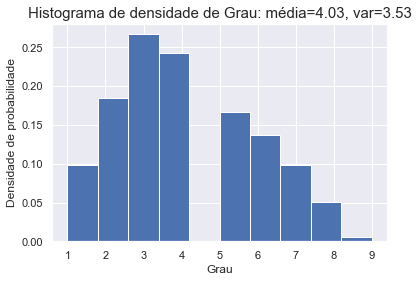

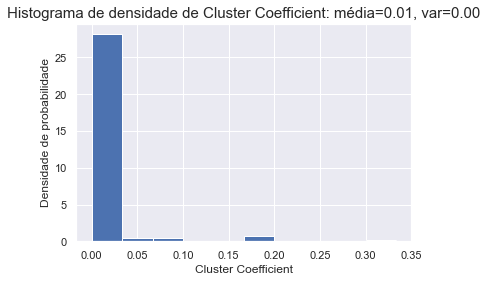

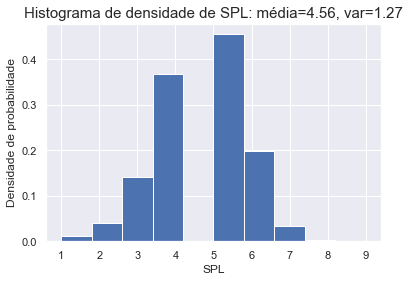

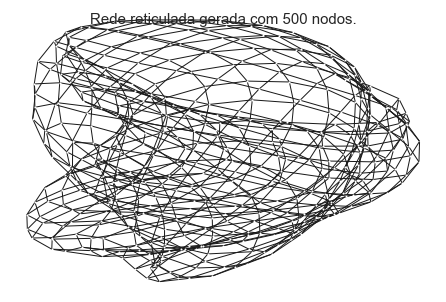

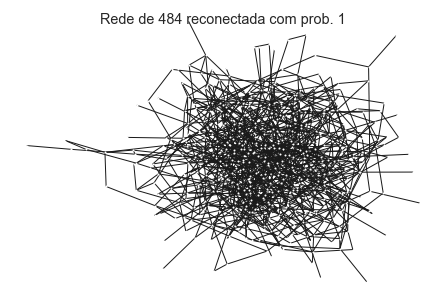

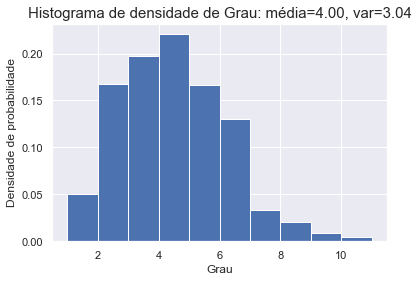

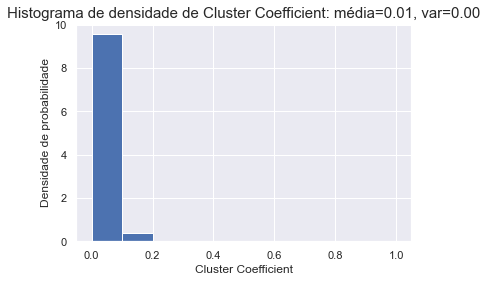

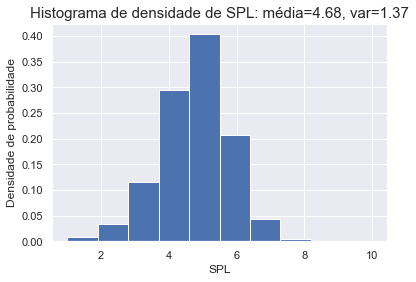

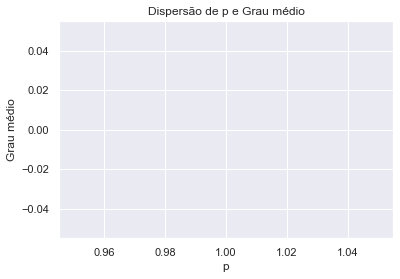

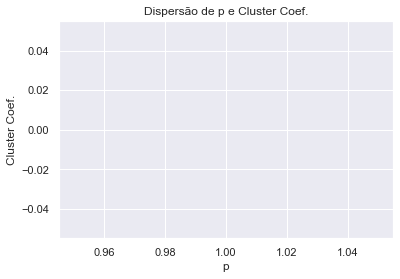

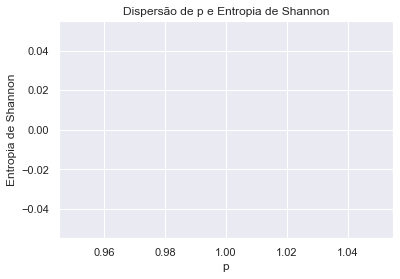

In [4]:
# Rede Reticulada
list_N = [10, 50, 100, 500]
list_p = [0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.5, 0.75, 1]
network_model = "ws_reticulated"

for _n in list_N:
    for _p in list_p:
        G = regular_reticulated(_n, True, "graph_{}_n{}_regular.jpg".format(network_model, str(_n)))
        G = reconnect_regular(G, _p, "graph_{}_n{}_reconnected.jpg".format(network_model, str(_n)))
        degree_dist = degree_distribution(G)
        cluster_dist = clustering_coef_distribution(G)
        spl_dist = spl_distribution(G)
        distribution_plot(degree_dist, var_name="Grau", file_name="degree_dist_{}_n{}.jpg".format(network_model, str(_n), str(_p)))
        distribution_plot(cluster_dist, var_name="Cluster Coefficient",file_name="cc_dist_{}_n{}.jpg".format(network_model, str(_n), str(_p)))
        distribution_plot(spl_dist, var_name="SPL", file_name="spl_dist_{}_n{}.jpg".format(network_model, str(_n), str(_p)))

        
list_N = [500]
list_p = [0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.5, 0.75, 1]
list_mean_k = []
list_mean_cc = []
list_shannon_entropy = []

for _n in list_N:
    for _p in list_p:
        G = regular_reticulated(_n, False)
        G = reconnect_regular(G, _p, False)
        degree_dist = degree_distribution(G)
        cluster_dist = clustering_coef_distribution(G)
        list_mean_k.append(np.mean(degree_dist))
        list_mean_cc.append(np.mean(cluster_dist))
        list_shannon_entropy.append(shannon_entropy(G))
        
simple_plot2d(list_p, list_mean_k, "p", "Grau médio", "plot2d_p_mean_k_{}.jpg".format(network_model))
simple_plot2d(list_p, list_mean_cc, "p", "Cluster Coef.", "plot2d_p_mean_cc_{}.jpg".format(network_model))
simple_plot2d(list_p, list_shannon_entropy, "p", "Entropia de Shannon", "plot2d_p_shannon_{}.jpg".format(network_model))


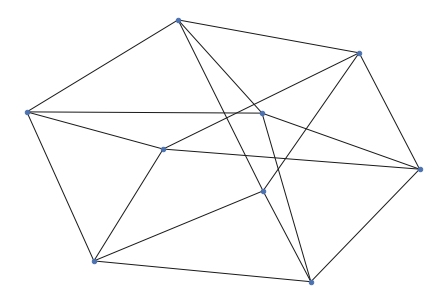

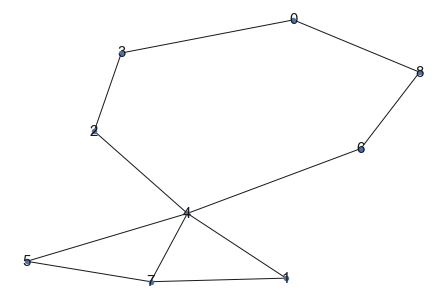

In [118]:
# Rede Reticulada

def regular_reticulated(N: int, 
                        plot: bool = True,
                        file_name: str = None) -> nx.classes.graph.Graph:
    """
    Define uma rede reticulada regular com as propriedades:
     - cada nodo é conectado aos seus vizinhos mais próximos (horizontal e verticalmente)
     - as bordas da rede são ligadas entre si
     
     Dada a escolha de representaçào dos nodos como posiçõs em uma matriz, podemos usar
     a simetria da matriz para referenciar todos os pontos como elementos de uma única lista:
     
     A_ij = L[i+j*L]
     
     Por exmeplo, se N=10, haverá uma rede reticulada de 3x3 com arestas dadas por:
     list_edges = [ (0,1), (1,2), (2,0), 
                    (3,4), (4,5), (5,3), 
                    (6,7), (7,8), (8,6),
                    (0,3), (3,6), (6,0), 
                    (1,4), (4,7), (7,1), 
                    (2,5), (5,8), (8,2)]     
    """

    G = nx.Graph()
    L = math.floor(N**(0.5))
    
    # Ligações na horizontal  
    for i in range(L*L):
        x = i % L
        y = i // L
        if x+1 < L and y < L:
            G.add_edge(i, i+1)        
        else: 
            G.add_edge(i, L*y)
    # Ligações na vertical
    for i in range(L*L):
        y = i % L
        x = i // L
        if x+1 < L and y < L:
            G.add_edge(i, i+L)        
        else: 
            G.add_edge(i, y)
            
    # Para calcularmos medidas de distância precisaremos remover nós não conectados
    # No trecho abaixo mantemos somente o maior componente conctado da rede.
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)
            
    if plot:
        pos = nx.spring_layout(G)
        fig_net = nx.draw(G, pos, node_color='b', node_size=20, with_labels=False)
        #plt.suptitle("Rede reticulada gerada com {} nodos.".format(N), fontsize=15)
        plt.show(fig_net)
              
    return G


def reconnect_regular(G: nx.classes.graph.Graph, 
                      p: float,
                      plot: bool = True,
                      file_name: str = None) -> nx.classes.graph.Graph:
    """
    Dada uma rede regular, para cada conexão avalia com probabilidade
    p'< p (dado como parâmetro)
    a remoção da aresta e criação de nova conexão com um nó aleatório da rede.
    """
    N = len(G)
    nodes = list(G.nodes())    
    for node in nodes:
        edges_node = list(G.edges(node))
        for edge in edges_node:
            if random.random() < p:
                random_node = secrets.choice(nodes)
                new_edge = (node, random_node)
                # Remove selected edge. Add new edge      
                G.remove_edge(list(edge)[0], list(edge)[-1])
                G.add_edge(node, random_node)           

    # Para calcularmos medidas de distância precisaremos remover nós não conectados
    # No trecho abaixo mantemos somente o maior componente conctado da rede.
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)
                
    if plot:
        pos = nx.spring_layout(G)
        fig_net = nx.draw(G, pos, node_color='b', node_size=20, with_labels=True, font_size=15)
        plt.show(fig_net)
    
    return G


list_N = [9]
list_p = [1]
network_model = "ws_reticulated"

for _n in list_N:
    for _p in list_p:
        G = regular_reticulated(_n, True, "graph_{}_n{}_regular.jpg".format(network_model, str(_n)))
        G = reconnect_regular(G, 1, "graph_{}_n{}_reconnected.jpg".format(network_model, str(_n)))


Para as redes de pequeno mundo interessa-nos particularmente estudar o comportamento da medida
de tamanho do menor caminho da rede em função da probabilidade de reconexão p e entender para qual valor de
p pode-se considerar que os efeitos de "pequeno mundo" estão estabelecidos.

In [82]:
A = nx.to_numpy_matrix(G)
print(A)

[[0. 1. 1. 1. 0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1. 0.]]


In [ ]:
n = 500
sample = 50

plot_avg_shortest_path(n, sample, "plot2d_p_avg_sp_ws_reticular.jpg")